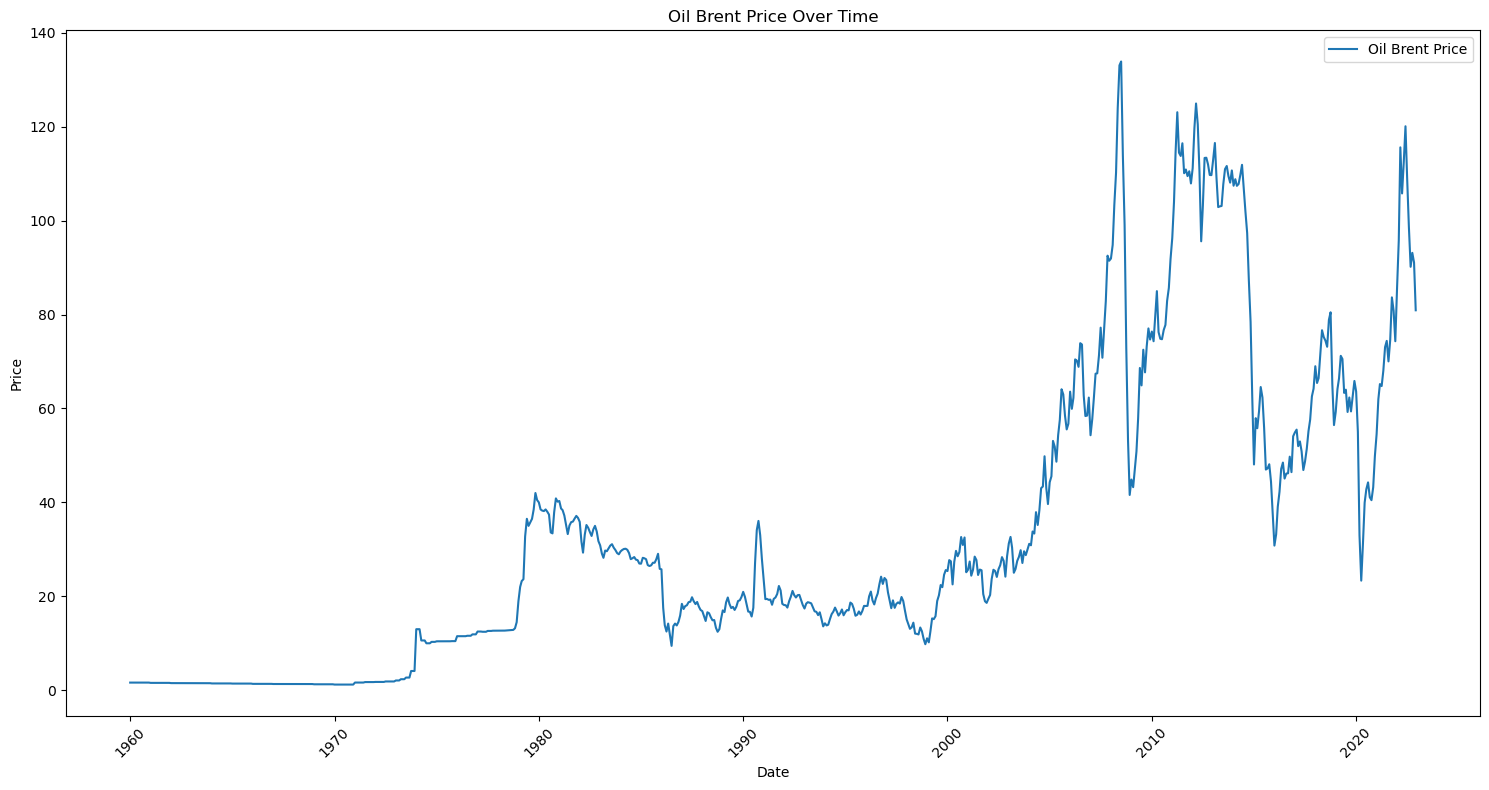

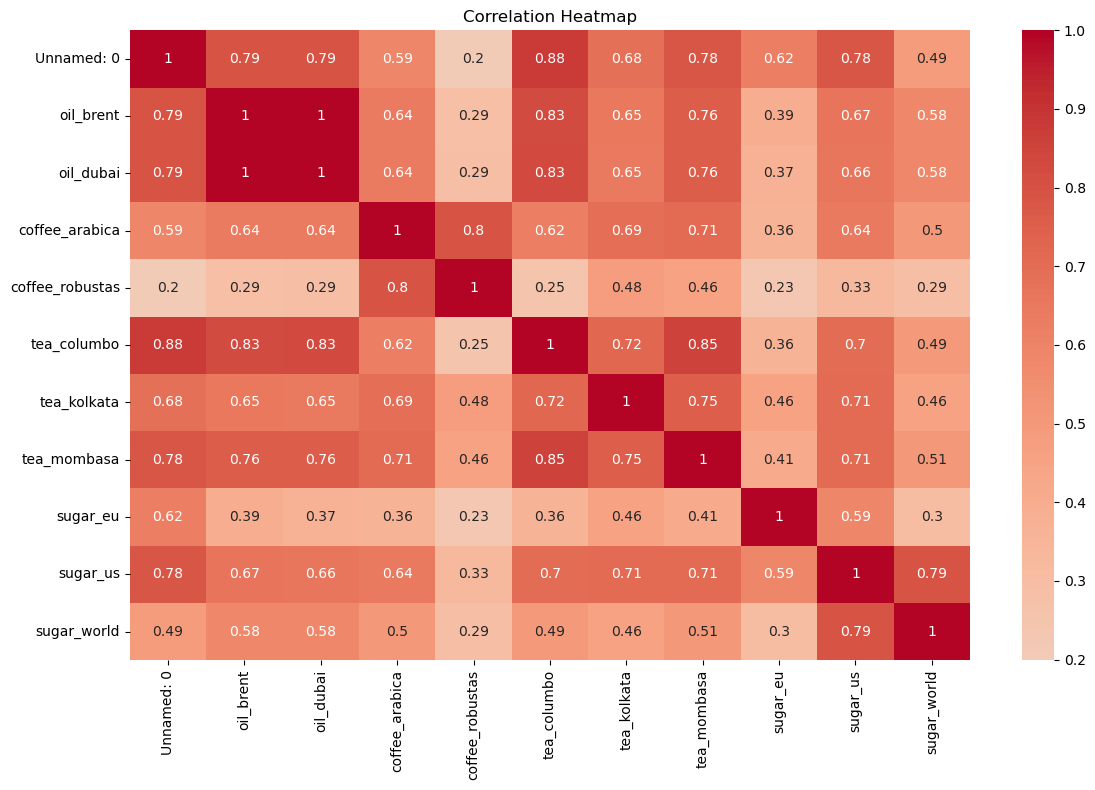


Random Forest Metrics:
RMSE: 4.42
MAE: 2.26
R2 Score: 0.98

XGBoost Metrics:
RMSE: 3.99
MAE: 2.11
R2 Score: 0.98


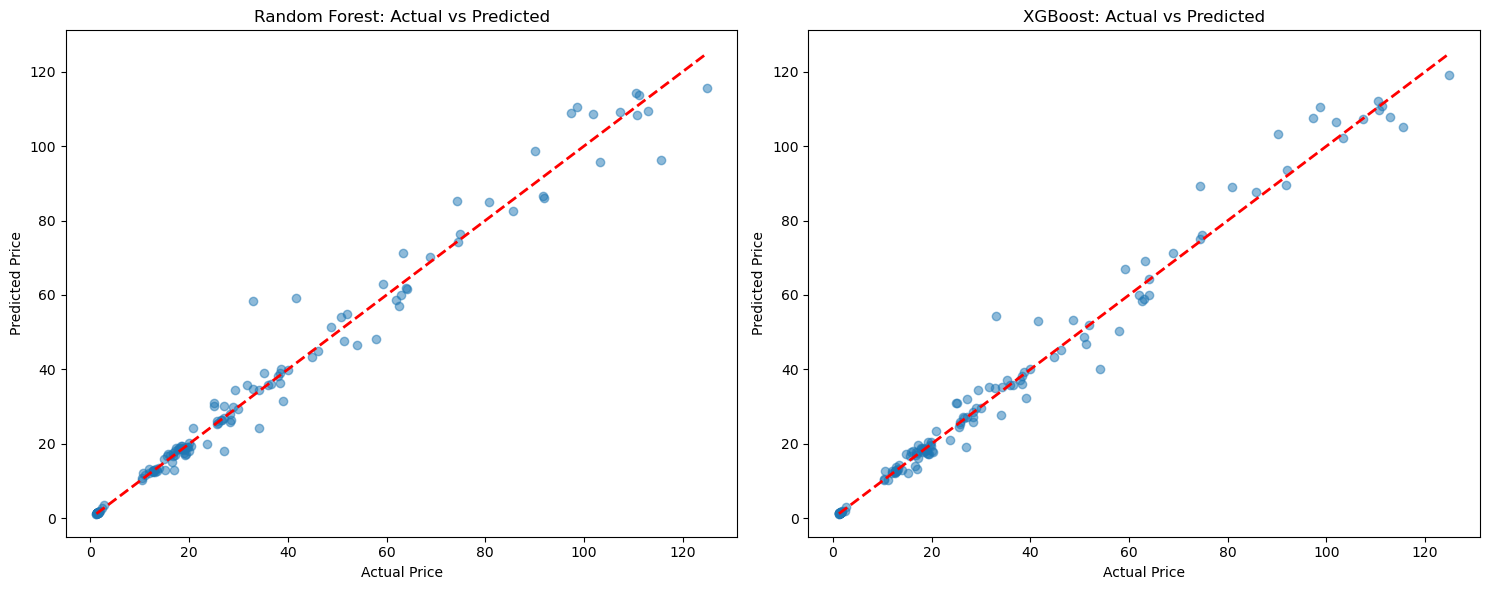

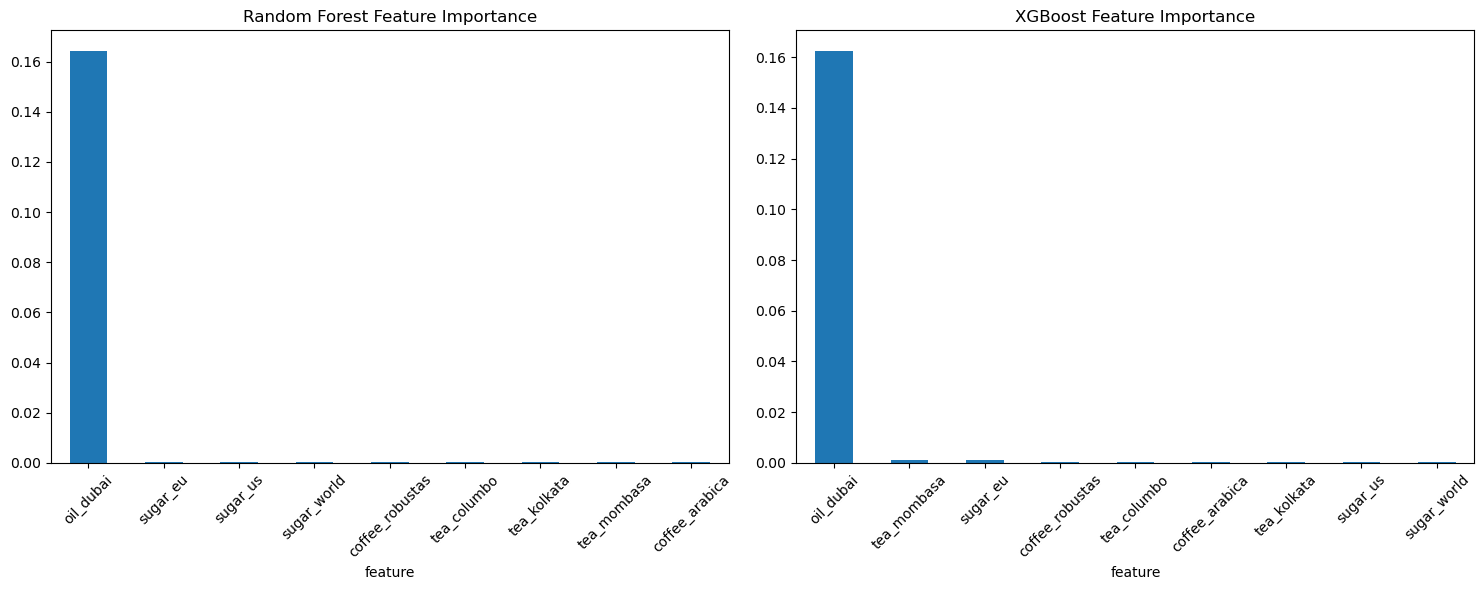

In [3]:
# comprehensive price prediction project with visualizations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load and prepare data
df = pd.read_csv('commodity_prices.csv')
df['date'] = pd.to_datetime(df['date'])

# 2. Initial Data Visualization
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['oil_brent'], label='Oil Brent Price')
plt.title('Oil Brent Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 3. Feature Engineering
def create_features(data, lookback=6):
    features = []
    targets = []
    
    for i in range(lookback, len(data)):
        features.append(data.iloc[i-lookback:i][['oil_dubai', 'coffee_arabica', 
                                               'coffee_robustas', 'tea_columbo', 
                                               'tea_kolkata', 'tea_mombasa', 
                                               'sugar_eu', 'sugar_us', 'sugar_world']].values.flatten())
        targets.append(data.iloc[i]['oil_brent'])
    
    return np.array(features), np.array(targets)

# Create features and target
X, y = create_features(df)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Models
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# 5. Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'\n{model_name} Metrics:')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R2 Score: {r2:.2f}')
    
    return rmse, mae, r2

# Evaluate both models
rf_metrics = evaluate_model(y_test, rf_pred, 'Random Forest')
xgb_metrics = evaluate_model(y_test, xgb_pred, 'XGBoost')

# 6. Visualization of Results
# Actual vs Predicted Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Feature Importance Plot
plt.figure(figsize=(15, 6))

# Random Forest Feature Importance
feature_names = ['oil_dubai', 'coffee_arabica', 'coffee_robustas', 
                'tea_columbo', 'tea_kolkata', 'tea_mombasa', 
                'sugar_eu', 'sugar_us', 'sugar_world'] * 6

plt.subplot(1, 2, 1)
importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
})
importance_rf = importance_rf.groupby('feature')['importance'].mean().sort_values(ascending=False)
importance_rf[:10].plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)

# XGBoost Feature Importance
plt.subplot(1, 2, 2)
importance_xgb = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_model.feature_importances_
})
importance_xgb = importance_xgb.groupby('feature')['importance'].mean().sort_values(ascending=False)
importance_xgb[:10].plot(kind='bar')
plt.title('XGBoost Feature Importance')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [5]:
df.isnull()

Unnamed: 0   date  oil_brent  oil_dubai  coffee_arabica  coffee_robustas  \
0         False  False      False      False           False            False   
1         False  False      False      False           False            False   
2         False  False      False      False           False            False   
3         False  False      False      False           False            False   
4         False  False      False      False           False            False   
..          ...    ...        ...        ...             ...              ...   
751       False  False      False      False           False            False   
752       False  False      False      False           False            False   
753       False  False      False      False           False            False   
754       False  False      False      False           False            False   
755       False  False      False      False           False            False   

     tea_columbo  tea_kolkata  tea_mombasa  sugar_eu  sugar_us  sugar_world  
0          False        False        False     False     False        False  
1          False        False        False     False     False        False  
2          False        False        False     False     False        False  
3          False        False        False     False     False        False  
4          False        False        False     False     False        False  
..           ...          ...          ...       ...       ...          ...  
751        False        False        False     False     False        False  
752        False        False        False     False     False        False  
753        False        False        False     False     False        False  
754        False        False        False     False     False        False  
755        False        False        False     False     False        False  

[756 rows x 12 columns]

In [6]:
df.isnull().sum()

Unnamed: 0         0
date               0
oil_brent          0
oil_dubai          0
coffee_arabica     0
coffee_robustas    0
tea_columbo        0
tea_kolkata        0
tea_mombasa        0
sugar_eu           0
sugar_us           0
sugar_world        0
dtype: int64

In [7]:
df.duplicated().sum()

0

C:\Users\laksh\AppData\Local\Temp\ipykernel_17388\2789294127.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Dataset Overview:
    Unnamed: 0       date  oil_brent  oil_dubai  coffee_arabica  \
0           1 1960-01-01       1.63       1.63          0.9409   
1           2 1960-02-01       1.63       1.63          0.9469   
2           3 1960-03-01       1.63       1.63          0.9281   
3           4 1960-04-01       1.63       1.63          0.9303   
4           5 1960-05-01       1.63       1.63          0.9200   

   coffee_robustas  tea_columbo  tea_kolkata  tea_mombasa  sugar_eu  sugar_us  \
0         0.696864     0.930301     1.121401       1.0374  0.122356  0.116845   
1         0.688707     0.930301     1.121401       1.0374  0.122356  0.119049   
2         0.688707     0.930301     1.121401       1.0374  0.122356  0.121254   
3         0.684519     0.930301     1.121401       1.0374  0.122356  0.123459   
4         0.690692     0.930301     1.121401       1.0374  0.122356  0.121254   

   sugar_world  
0       0.0666  
1       0.0679  
2       0.0683  
3       0.0681  
4       0.06

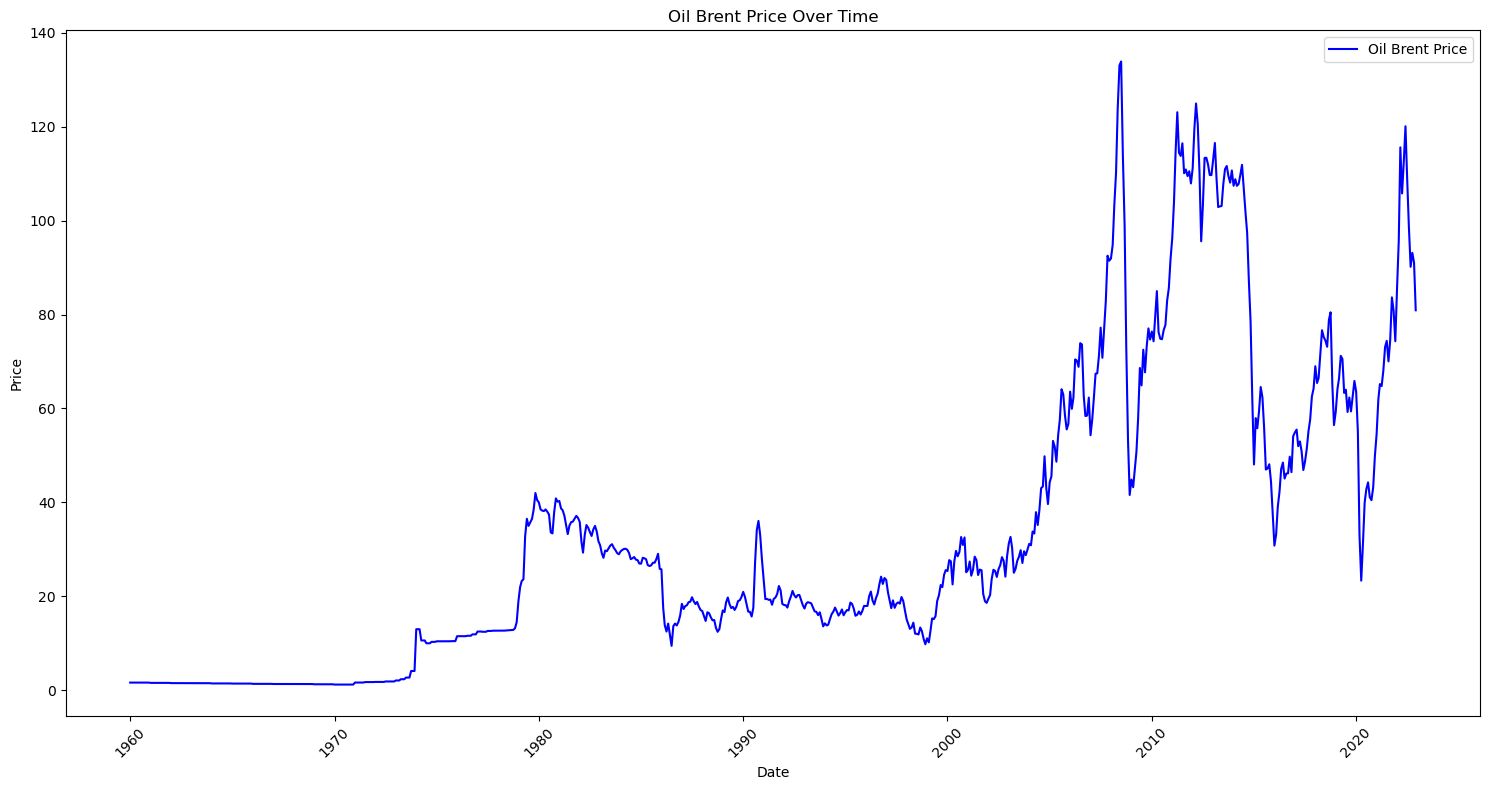


Summary Statistics:
        Unnamed: 0                           date   oil_brent   oil_dubai  \
count  756.000000                            756  756.000000  756.000000   
mean   378.500000  1991-06-16 20:07:37.142857088   32.724944   31.238130   
min      1.000000            1960-01-01 00:00:00    1.210000    1.210000   
25%    189.750000            1975-09-23 12:00:00   10.564999   10.452500   
50%    378.500000            1991-06-16 00:00:00   20.489130   18.550000   
75%    567.250000            2007-03-08 18:00:00   47.157500   45.576023   
max    756.000000            2022-12-01 00:00:00  133.873043  131.224783   
std    218.382692                            NaN   31.885368   30.936611   

       coffee_arabica  coffee_robustas  tea_columbo  tea_kolkata  tea_mombasa  \
count      756.000000       756.000000   756.000000   756.000000   756.000000   
mean         2.576555         1.727478     1.777962     1.870308     1.671222   
min          0.777600         0.487210     0.43419

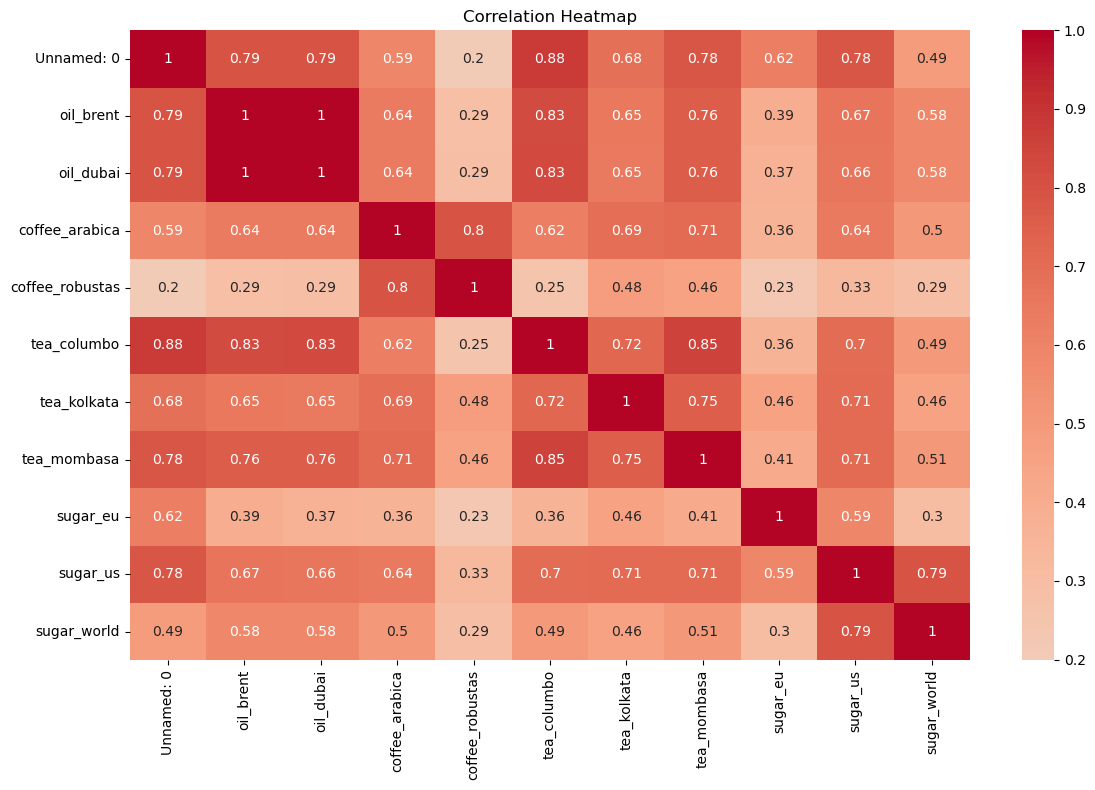


Random Forest Metrics:
RMSE: 4.42
MAE: 2.26
R2 Score: 0.98

XGBoost Metrics:
RMSE: 3.99
MAE: 2.11
R2 Score: 0.98


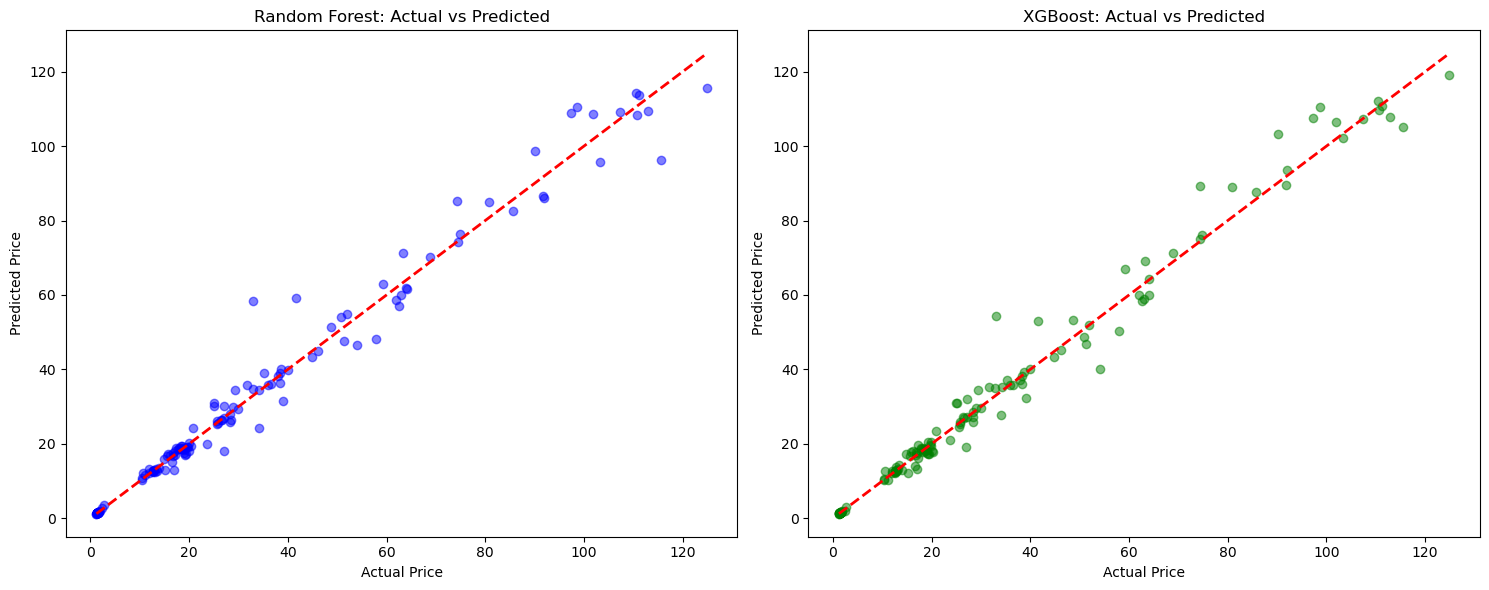

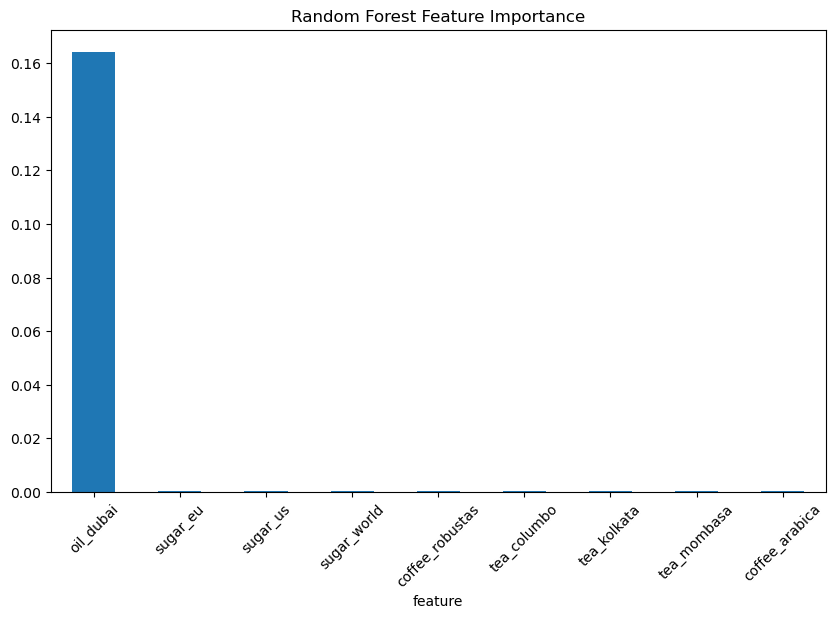

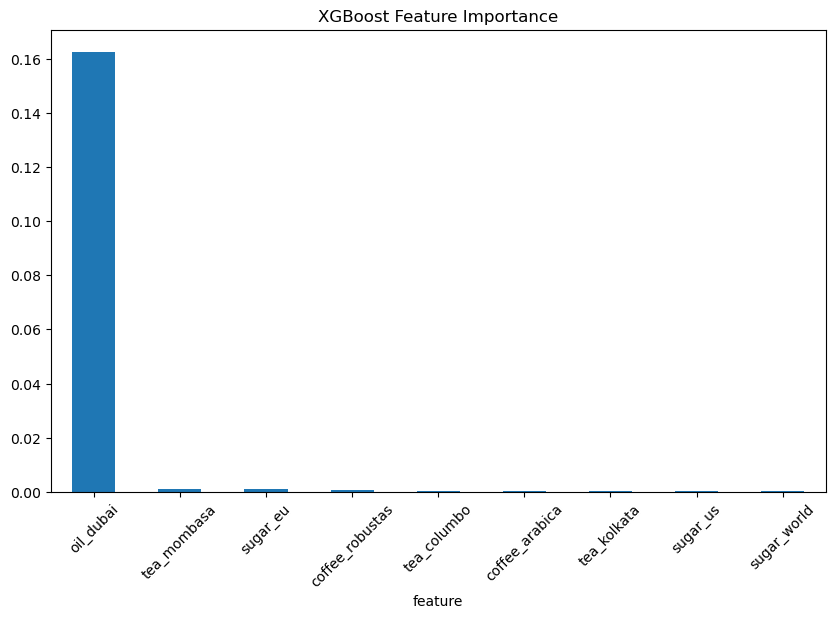

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load and Prepare Data
def load_and_prepare_data(file_path):
    # Load dataset
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])

    # Handle missing values
    df.fillna(method='ffill', inplace=True)

    # Basic checks
    print("Dataset Overview:\n", df.head())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDataset Info:\n")
    df.info()

    return df

# Load data
df = load_and_prepare_data('commodity_prices.csv')

# 2. EDA (Exploratory Data Analysis)
def perform_eda(df):
    # Line plot for trends
    plt.figure(figsize=(15, 8))
    plt.plot(df['date'], df['oil_brent'], label='Oil Brent Price', color='blue')
    plt.title('Oil Brent Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Summary statistics
    print("\nSummary Statistics:\n", df.describe())

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation = df.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

perform_eda(df)

# 3. Feature Engineering
def create_features(data, lookback=6):
    features = []
    targets = []

    for i in range(lookback, len(data)):
        features.append(data.iloc[i-lookback:i][['oil_dubai', 'coffee_arabica', 
                                                 'coffee_robustas', 'tea_columbo', 
                                                 'tea_kolkata', 'tea_mombasa', 
                                                 'sugar_eu', 'sugar_us', 'sugar_world']].values.flatten())
        targets.append(data.iloc[i]['oil_brent'])

    return np.array(features), np.array(targets)

# Create features and target
X, y = create_features(df)

# 4. Data Splitting and Scaling
def preprocess_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(X, y)

# 5. Model Training and Evaluation
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\n{model_name} Metrics:')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R2 Score: {r2:.2f}')

    return model, y_pred

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model, rf_pred = train_and_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest')

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model, xgb_pred = train_and_evaluate_model(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test, 'XGBoost')

# 6. Visualization of Results
def visualize_results(y_test, rf_pred, xgb_pred):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, rf_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Random Forest: Actual vs Predicted')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, xgb_pred, alpha=0.5, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('XGBoost: Actual vs Predicted')

    plt.tight_layout()
    plt.show()

visualize_results(y_test, rf_pred, xgb_pred)

# Feature Importance Visualization
def plot_feature_importance(model, model_name):
    feature_names = ['oil_dubai', 'coffee_arabica', 'coffee_robustas', 
                     'tea_columbo', 'tea_kolkata', 'tea_mombasa', 
                     'sugar_eu', 'sugar_us', 'sugar_world'] * 6

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    })
    importance_df = importance_df.groupby('feature')['importance'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    importance_df[:10].plot(kind='bar')
    plt.title(f'{model_name} Feature Importance')
    plt.xticks(rotation=45)
    plt.show()

plot_feature_importance(rf_model, 'Random Forest')
plot_feature_importance(xgb_model, 'XGBoost')


Maximum price of Robusta coffee: $6.88
75th percentile of sugar prices in the EU: $0.57
Skewness of Arabica coffee prices: 0.59
Sugar prices in the US are not significantly different from a normal distribution.
Number of times Dubai oil price exceeded Brent oil price by $10: 0


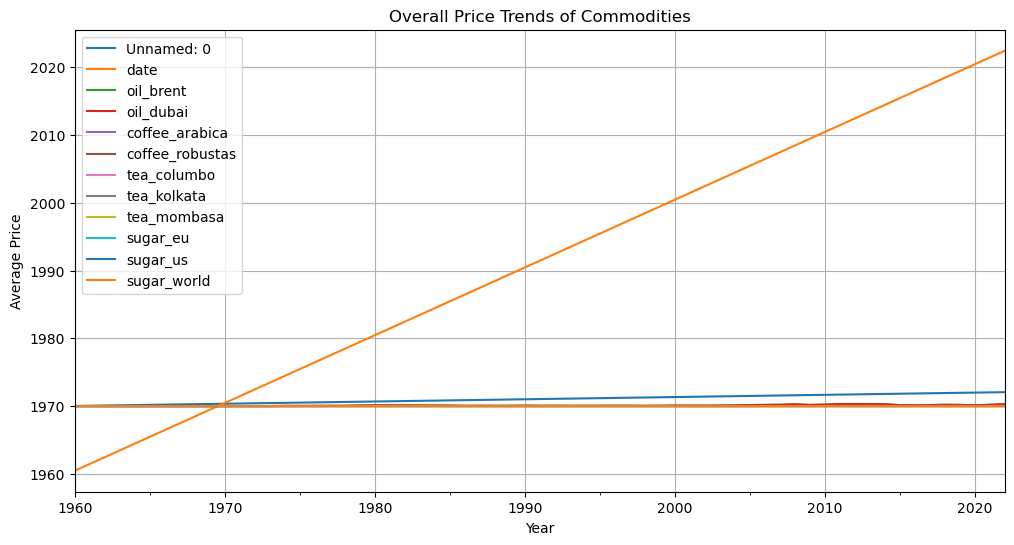

Commodity with the highest price fluctuations: Unnamed: 0


C:\Users\laksh\AppData\Local\Temp\ipykernel_17388\659432009.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_years['quarter'] = last_5_years['date'].dt.to_period('Q')


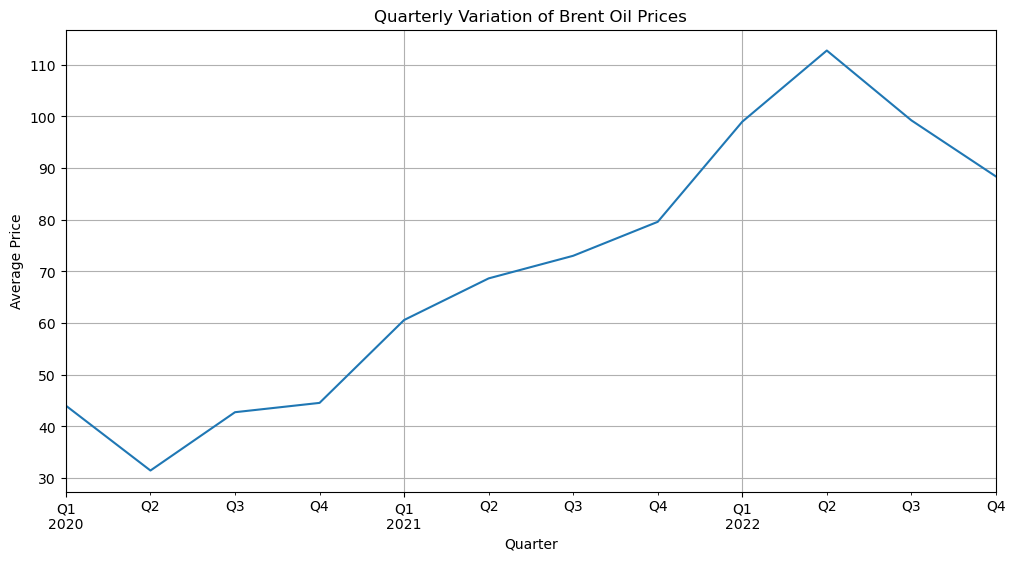

Correlation between global and EU sugar prices: 0.30
Correlation between global and US sugar prices: 0.79
There is a significant difference in the sugar price distribution between Europe (EU) and the United States (US).


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import skew, normaltest

# Load the dataset
df = pd.read_csv('commodity_prices.csv')

# 1. Maximum price of Robusta coffee
max_robusta = df['coffee_robustas'].max()
print(f"Maximum price of Robusta coffee: ${max_robusta:.2f}")

# 2. 75th percentile of sugar prices in the EU
percentile_75_sugar_eu = np.percentile(df['sugar_eu'].dropna(), 75)
print(f"75th percentile of sugar prices in the EU: ${percentile_75_sugar_eu:.2f}")

# 3. Skewness of the price distribution for Arabica coffee
skewness_arabica = skew(df['coffee_arabica'].dropna())
print(f"Skewness of Arabica coffee prices: {skewness_arabica:.2f}")

# 4. Normality test for sugar prices in the US
stat, p_value = normaltest(df['sugar_us'].dropna())
if p_value < 0.05:
    print("Sugar prices in the US are significantly different from a normal distribution.")
else:
    print("Sugar prices in the US are not significantly different from a normal distribution.")

# 5. Number of times Dubai oil price exceeds Brent oil price by $10
threshold_exceeds = np.sum((df['oil_dubai'] - df['oil_brent']) > 10)
print(f"Number of times Dubai oil price exceeded Brent oil price by $10: {threshold_exceeds}")

# 6. Overall price trend for each commodity
df['date'] = pd.to_datetime(df['date'])
price_trends = df.groupby(df['date'].dt.to_period('Y')).mean()
price_trends.plot(figsize=(12, 6), title="Overall Price Trends of Commodities")
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# 7. Commodity with the highest price fluctuations
price_fluctuations = df.std(numeric_only=True)
highest_fluctuation = price_fluctuations.idxmax()
print(f"Commodity with the highest price fluctuations: {highest_fluctuation}")

# 8. Brent oil price variation on a quarterly basis for the last 5 years
last_5_years = df[df['date'] >= pd.Timestamp.now() - pd.DateOffset(years=5)]
last_5_years['quarter'] = last_5_years['date'].dt.to_period('Q')
quarterly_variation = last_5_years.groupby('quarter')['oil_brent'].mean()
quarterly_variation.plot(figsize=(12, 6), title="Quarterly Variation of Brent Oil Prices")
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.grid()
plt.show()

# 9. Correlation between global sugar prices and EU/US sugar prices
correlation_eu = df['sugar_world'].corr(df['sugar_eu'])
correlation_us = df['sugar_world'].corr(df['sugar_us'])
print(f"Correlation between global and EU sugar prices: {correlation_eu:.2f}")
print(f"Correlation between global and US sugar prices: {correlation_us:.2f}")

# 10. Difference in sugar price distribution between EU and US
eu_prices = df['sugar_eu'].dropna()
us_prices = df['sugar_us'].dropna()
stat, p_value = normaltest(eu_prices - us_prices)
if p_value < 0.05:
    print("There is a significant difference in the sugar price distribution between Europe (EU) and the United States (US).")
else:
    print("There is no significant difference in the sugar price distribution between Europe (EU) and the United States (US).")


In [10]:
df.describe()

Unnamed: 0                           date   oil_brent   oil_dubai  \
count  756.000000                            756  756.000000  756.000000   
mean   378.500000  1991-06-16 20:07:37.142857088   32.724944   31.238130   
min      1.000000            1960-01-01 00:00:00    1.210000    1.210000   
25%    189.750000            1975-09-23 12:00:00   10.564999   10.452500   
50%    378.500000            1991-06-16 00:00:00   20.489130   18.550000   
75%    567.250000            2007-03-08 18:00:00   47.157500   45.576023   
max    756.000000            2022-12-01 00:00:00  133.873043  131.224783   
std    218.382692                            NaN   31.885368   30.936611   

       coffee_arabica  coffee_robustas  tea_columbo  tea_kolkata  tea_mombasa  \
count      756.000000       756.000000   756.000000   756.000000   756.000000   
mean         2.576555         1.727478     1.777962     1.870308     1.671222   
min          0.777600         0.487210     0.434198     0.664799     0.719600   
25%          1.351625         0.923053     0.892501     1.297369     1.136800   
50%          2.697794         1.632172     1.504001     1.850612     1.598257   
75%          3.312950         2.282200     2.515204     2.376899     2.083830   
max          7.003600         6.883547     4.490000     4.073011     3.392500   
std          1.342454         0.940748     1.008679     0.697867     0.615357   

         sugar_eu    sugar_us  sugar_world  
count  756.000000  756.000000   756.000000  
mean     0.405158    0.432462     0.240263  
min      0.112215    0.116845     0.028700  
25%      0.298120    0.297624     0.139705  
50%      0.402343    0.471119     0.215285  
75%      0.569519    0.512188     0.309325  
max      0.783171    1.263247     1.237700  
std      0.187741    0.188589     0.151947

In [11]:
p_value

5.061986161302036e-21

In [19]:
import pandas as pd
from IPython.display import display, HTML

# Sample DataFrame
data = {
    'date': ['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01'],
    'oil_brent': [65.0, 58.5, 32.0, 23.0, 35.0],
    'oil_dubai': [62.0, 56.0, 31.5, 22.0, 34.0],
    'coffee_arabica': [3.1, 3.0, 2.9, 3.2, 3.5],
    'coffee_robustas': [1.2, 1.3, 1.1, 1.4, 1.5],
    'tea_columbo': [4.5, 4.4, 4.3, 4.6, 4.8],
    'tea_kolkata': [5.1, 5.2, 5.0, 5.3, 5.5],
    'tea_mombasa': [4.9, 4.8, 4.7, 4.6, 4.9],
    'sugar_eu': [0.6, 0.62, 0.58, 0.6, 0.61],
    'sugar_us': [0.5, 0.52, 0.5, 0.53, 0.55],
    'sugar_world': [0.55, 0.56, 0.54, 0.57, 0.59],
}

df = pd.DataFrame(data)

# Convert the DataFrame to an HTML table
html_table = df.head().to_html(index=False)

# Display the HTML table in Jupyter Notebook
display(HTML(html_table))
